In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
dataset = pd.read_csv("diabetes.csv")

In [25]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
dataset.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [29]:
dataset.isnull()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [21]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


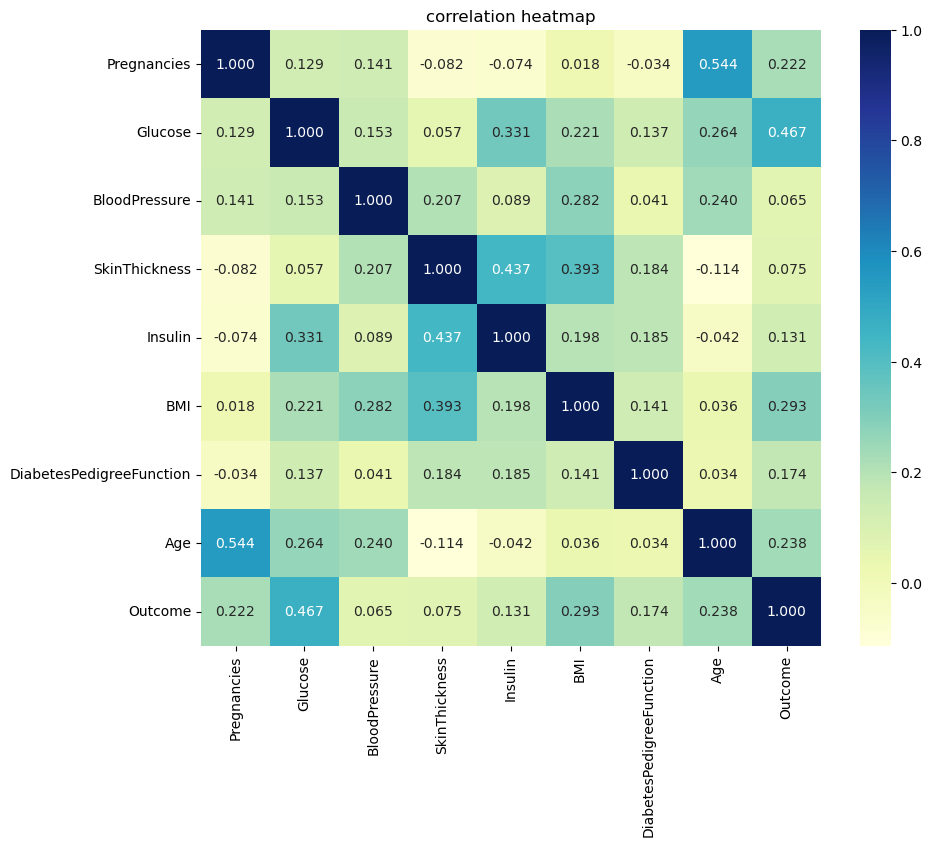

In [53]:
#correlation plo of independent variable
plt.figure(figsize =(10,8))
sns.heatmap(dataset.corr(), annot= True,fmt = ".3f",cmap = "YlGnBu")
plt.title("correlation heatmap")
plt.show()

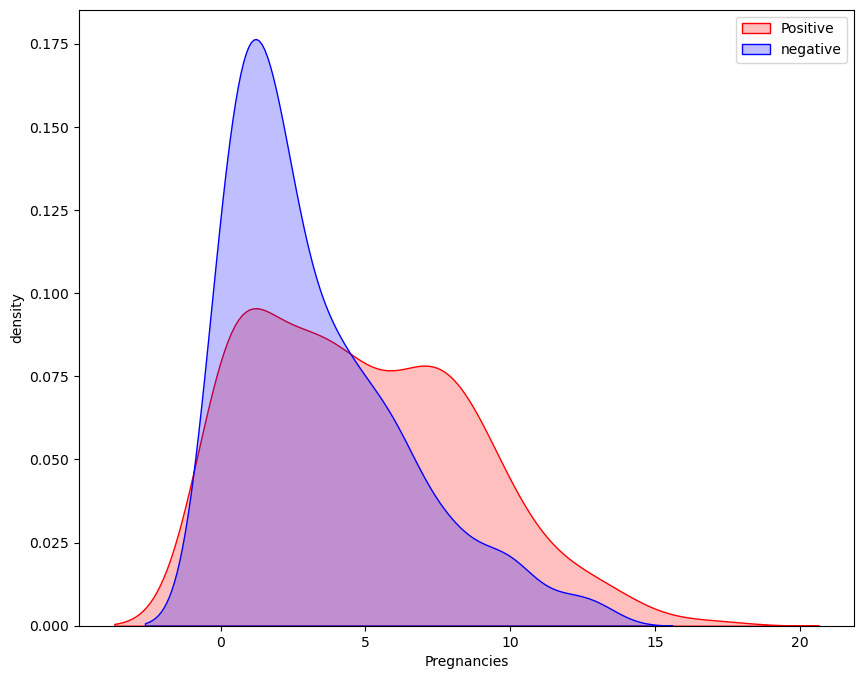

In [51]:
#exploring pregnancy 
plt.figure(figsize =(10,8))
#plotting density function
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1] ,color = "red",fill=True)
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0] ,color = "blue",fill=True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("density")
kde.legend(["Positive","negative"])
plt.show()

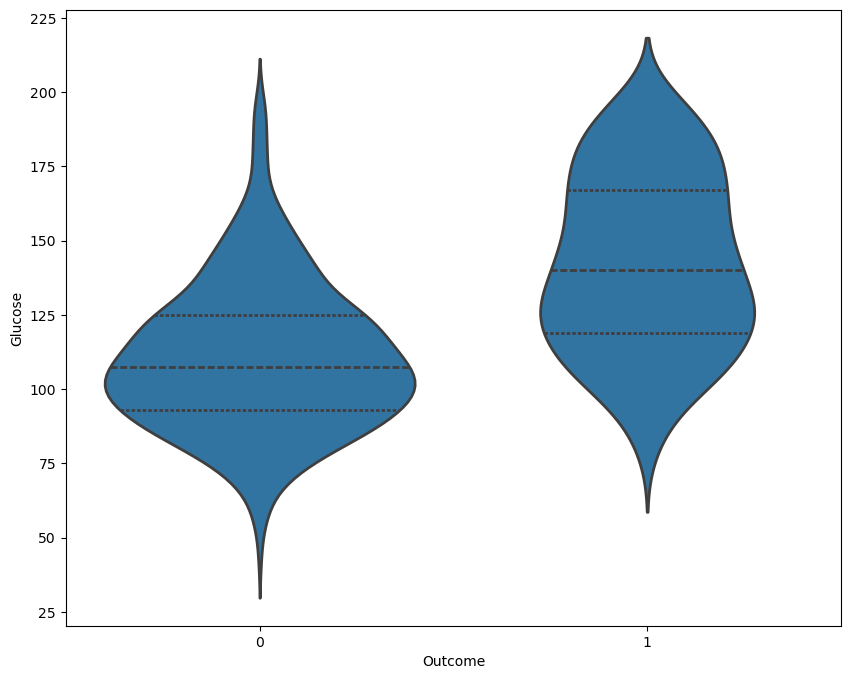

In [71]:
plt.figure(figsize =(10,8))
sns.violinplot(data =dataset,x ="Outcome",y ="Glucose",fill=True,linewidth = 2, inner = "quart")
plt.show()

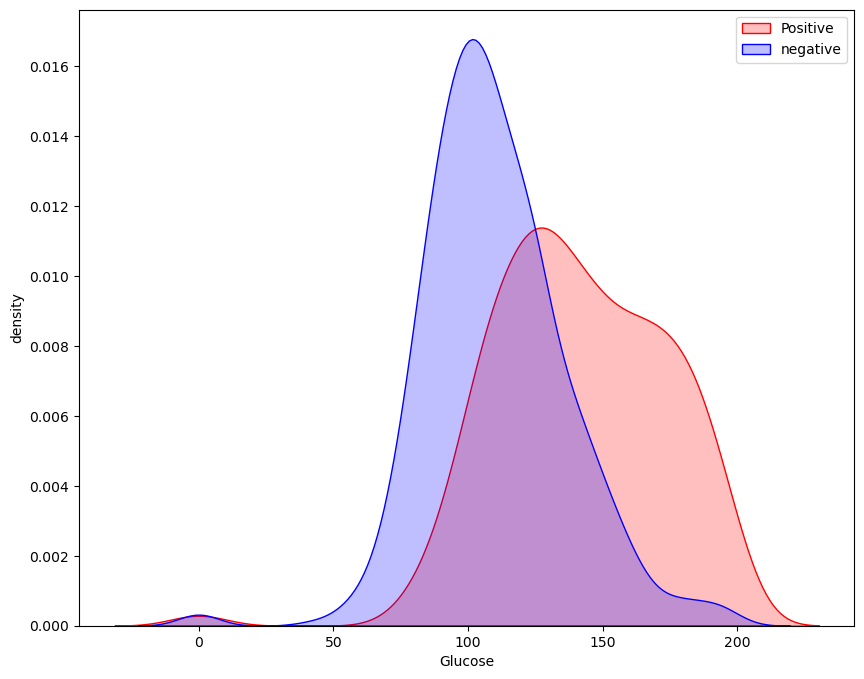

In [55]:
#exploring glucose
plt.figure(figsize =(10,8))
#plotting density function
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==1] ,color = "red",fill=True)
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==0] ,color = "blue",fill=True)
kde.set_xlabel("Glucose")
kde.set_ylabel("density")
kde.legend(["Positive","negative"])
plt.show()

In [31]:
#replacing zero values with mean or median
#Glucose
dataset["Glucose"] = dataset["Glucose"].replace(0,dataset["Glucose"].median())
#bp
dataset["BloodPressure"] = dataset["BloodPressure"].replace(0,dataset["BloodPressure"].median())
#BMI
dataset["BMI"] = dataset["BMI"].replace(0,dataset["BMI"].mean())
#SkinThickness
dataset["SkinThickness"] = dataset["SkinThickness"].replace(0,dataset["SkinThickness"].mean())
#Insulin
dataset["Insulin"] = dataset["Insulin"].replace(0,dataset["Insulin"].mean())

In [33]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [35]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [37]:
#spliting the dependent and indepent variables
x =dataset.drop(["Outcome"],axis =1)
y= dataset["Outcome"]


In [39]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,79.799479,33.6,0.627,50
1,1,85,66,29.000000,79.799479,26.6,0.351,31
2,8,183,64,20.536458,79.799479,23.3,0.672,32
3,1,89,66,23.000000,94.000000,28.1,0.167,21
4,0,137,40,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63
764,2,122,70,27.000000,79.799479,36.8,0.340,27
765,5,121,72,23.000000,112.000000,26.2,0.245,30
766,1,126,60,20.536458,79.799479,30.1,0.349,47


In [69]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [41]:
#splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split


In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.33,random_state=42)

In [45]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,20.536458,79.799479,24.0,1.022,34
223,7,142,60,33.000000,190.000000,28.8,0.687,61
393,4,116,72,12.000000,87.000000,22.1,0.463,37
766,1,126,60,20.536458,79.799479,30.1,0.349,47
570,3,78,70,20.536458,79.799479,32.5,0.270,39
...,...,...,...,...,...,...,...,...
71,5,139,64,35.000000,140.000000,28.6,0.411,26
106,1,96,122,20.536458,79.799479,22.4,0.207,27
270,10,101,86,37.000000,79.799479,45.6,1.136,38
435,0,141,72,20.536458,79.799479,42.4,0.205,29


In [47]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [49]:
training_accuracy =[]
test_accuracy = []
for n_neighbors in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
#checking accuracy score
    training_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

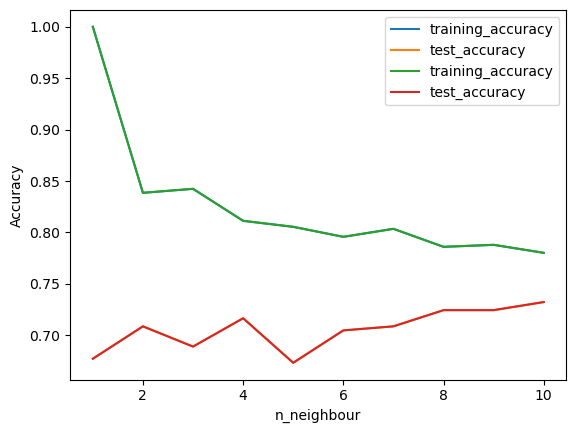

In [57]:
plt.plot(range (1,11),training_accuracy,label = "training_accuracy")
plt.plot(range (1,11),test_accuracy,label = "test_accuracy")
plt.ylabel ("Accuracy")
plt.xlabel("n_neighbour")
plt.legend()
plt.show()

In [59]:
knn=KNeighborsClassifier(n_neighbors =9)
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train),":Training accuracy")
print(knn.score(x_test,y_test),":Test accuracy")

0.7879377431906615 :Training accuracy
0.7244094488188977 :Test accuracy


In [61]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train),":Training accuracy")
print(dt.score(x_test,y_test),":Test accuracy")

1.0 :Training accuracy
0.6811023622047244 :Test accuracy


In [67]:
dt1 = DecisionTreeClassifier(random_state=0,max_depth = 3)
dt1.fit(x_train,y_train)
print(dt1.score(x_train,y_train),":Training accuracy")
print(dt1.score(x_test,y_test),":Test accuracy")

0.77431906614786 :Training accuracy
0.6929133858267716 :Test accuracy


In [75]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier(random_state=42)
mlp.fit(x_train,y_train)
print(mlp.score(x_train,y_train),":Training accuracy")
print(mlp.score(x_test,y_test),":Test accuracy")

0.7509727626459144 :Training accuracy
0.6811023622047244 :Test accuracy


In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

In [101]:
mlp1 =MLPClassifier(random_state=0)
mlp1.fit(x_train_scaled,y_train)
print(mlp1.score(x_train_scaled,y_train),":Training accuracy")
print(mlp1.score(x_test_scaled,y_test),":Test accuracy")

0.8326848249027238 :Training accuracy
0.7322834645669292 :Test accuracy


C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
